# Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

# Загрузить файл hr.csv.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import pylab 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('HR.csv', sep=',')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
data.corr().style.background_gradient(cmap='bone')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,-0.388375,0.0256052
last_evaluation,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,0.00656712,-0.00868377
number_project,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,0.0237872,-0.00606396
average_montly_hours,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,0.0712872,-0.00354441
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.144822,0.0674329
Work_accident,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,-0.154622,0.0392454
left,-0.388375,0.00656712,0.0237872,0.0712872,0.144822,-0.154622,1,-0.0617881
promotion_last_5years,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,-0.0617881,1


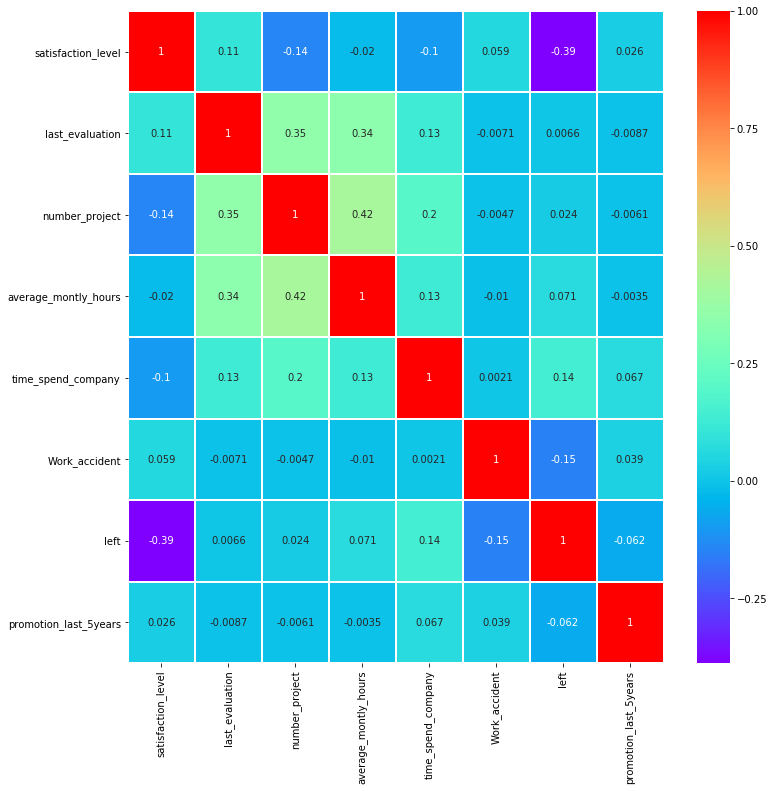

In [18]:
plt.subplots(figsize=(12, 12))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=1, 
            cmap='rainbow')

# 4.Визуализировать несколько взаимосвязей между переменными.

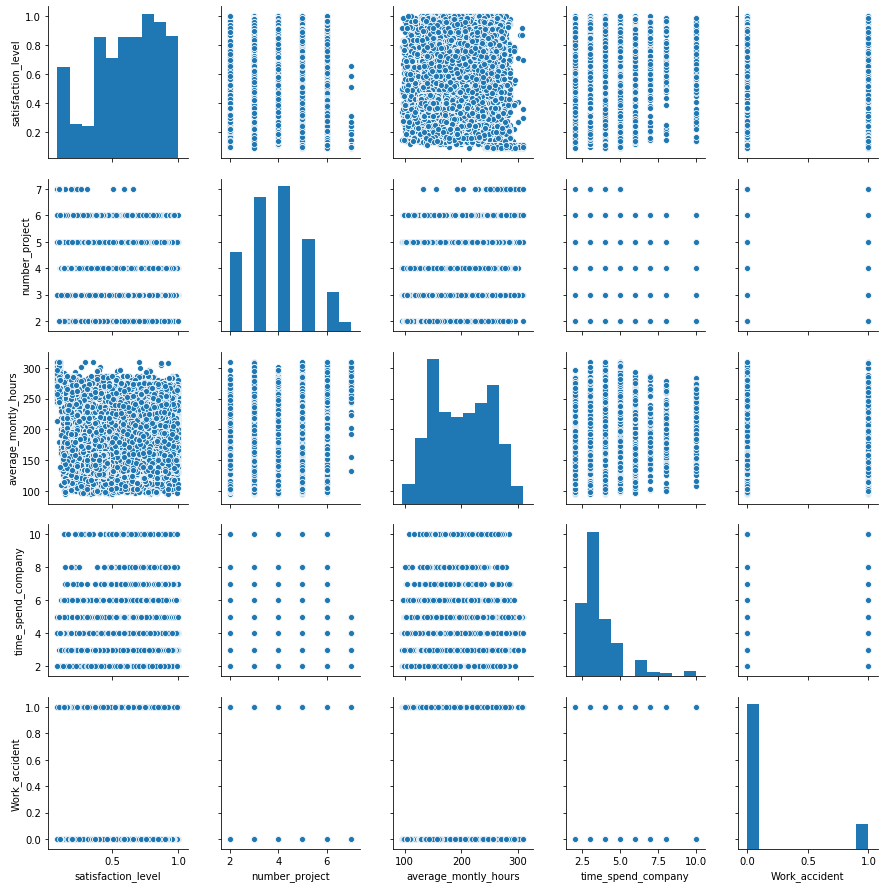

In [20]:
sns.pairplot(data[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident']])

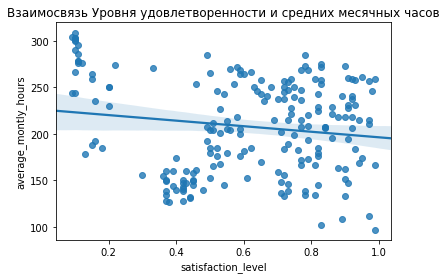

In [26]:
plt.title('Взаимосвязь Уровня удовлетворенности и средних месячных часов')
sns.regplot(x= 'satisfaction_level', y='average_montly_hours',data=data.sample(200), fit_reg=True)


# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [27]:
stats.ttest_ind(data['average_montly_hours'], data['satisfaction_level'])

Ttest_indResult(statistic=491.5064991295991, pvalue=0.0)

In [28]:
stats.ttest_ind(data['last_evaluation'], data['satisfaction_level'])

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)

In [30]:
stats.ttest_ind(data[data['salary'] == 'high']['satisfaction_level'], data[data['salary'] == 'low']['satisfaction_level'])

Ttest_indResult(statistic=4.76273109535092, pvalue=1.9413281282548522e-06)

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [43]:
employees_by_dep = data.groupby('sales')['salary'].count().to_frame().reset_index()
employees_by_dep.columns = ['Department','Number_of_Employees']
employees_by_dep

,Department,Number_of_Employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# 7.Показать распределение сотрудников по зарплатам.

In [45]:
employees_by_salary = data.groupby('salary')['sales'].count().to_frame().reset_index()
employees_by_salary.columns = ['Salary','Number_of_Employees']
employees_by_salary

,Salary,Number_of_Employees
0,high,1237
1,low,7316
2,medium,6446


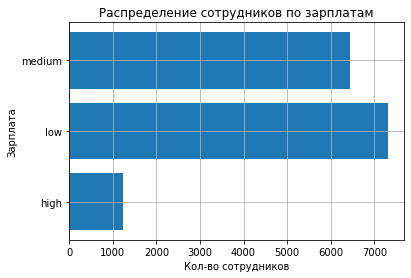

In [52]:
plt.barh(employees_by_salary['Salary'], employees_by_salary['Number_of_Employees'])
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Зарплата')
plt.title('Распределение сотрудников по зарплатам')
plt.grid()


# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [67]:
dep_salary_data = data.groupby(['salary', 'sales']).count().reset_index()

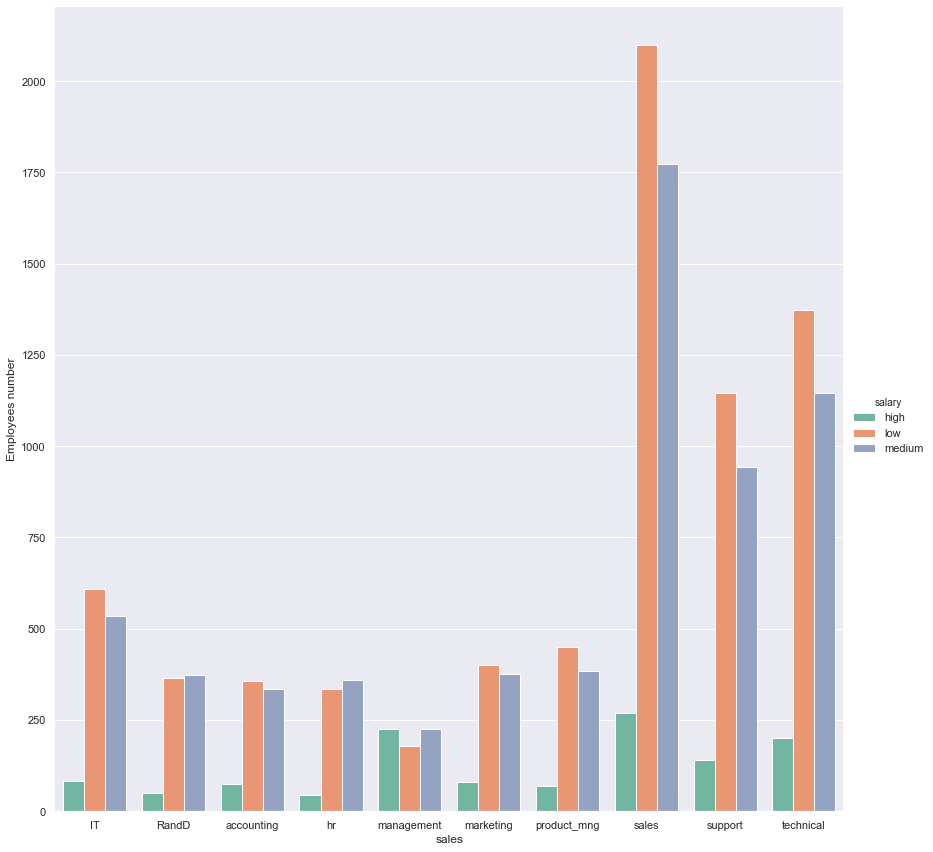

In [68]:
sns.set(style="darkgrid")
output = sns.catplot(x="sales", 
                     y = "satisfaction_level", 
                     hue="salary", 
                     data=dep_salary_data,
                     height=12, 
                     kind="bar", 
                     palette="Set2")
output.despine(left=True)
output.set_ylabels("Employees number")

# 9.Сколько сотрудников покинули компанию.

In [72]:
print('Компанию покинули:', data['left'].sum())

Компанию покинули: 3571


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [92]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Очевидно, что наибольшие колебания в значениях для оставшихся сотрудников и уволившихся по атким параметрам как уровень удовлетворенности, среднее кол-во часов в месяц, инциденты на работе и продвижения за последние 5 лет.

Гипотеза о том, что увольнения зависят от уровня удовлетворенности подтверждается.

In [94]:
stats.ttest_ind(data[data['left']==1]['satisfaction_level'], data[data['left']==0]['satisfaction_level'])


Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Кол-во часов в месяц также влияет на увольнения, но в значительно меньшей степени, скорее незначительно, т.к. pvalue<0

In [96]:
print(stats.ttest_ind(data[data['left']==1]['average_montly_hours'], data[data['left']==0]['average_montly_hours']))

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


Гипотеза о влиянии инцидентов на рабочем месте не подтверждается, т.к. pvalue значительно меньше 0 и при этом среднее значения наглядно показывает, что среднее кол-во инцидентов на рабочем месте больше у работающих, чем у уволившихся сотрудников.

In [99]:
print(stats.ttest_ind(data[data['left']==1]['Work_accident'], data[data['left']==0]['Work_accident']))

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)


In [ ]:
У уволившихся сотрудников меньше продвижений за последние 5 лет - данная гипотеза имеет право на жизнь.

In [102]:
print(stats.ttest_ind(data[data['left']==1]['promotion_last_5years'], data[data['left']==0]['promotion_last_5years']))

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)


Т.о. основной причиной ухода из компании по данным можно считать низкий уровень удовлетворенности, незначительными - отсутствие продвижений и среднее кол-во часов в месяц.